# Analysis with Geoprocessing

In [1]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from IPython.display import display
from arcgis.features import FeatureSet, Feature

In [2]:
from arcgis.geoprocessing import import_toolbox

### Create the GIS Object

In [3]:
gis = GIS(profile='agol_profile')

### Find and Create a Geoprocessing Toolbox

<Item title:"Viewshed" type:Geoprocessing Toolbox owner:esri>
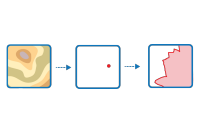

In [4]:
toolbox_item = gis.content.search("viewshed owner:esri", 
                                  item_type="geoprocessing toolbox", 
                                  max_items=1, outside_org=True)[0]
toolbox_item

In [5]:
tbx = import_toolbox(toolbox_item)

<img src="./img/loadedgp.png"  style="float:left"> 
    <div style="position: relative; width:600px;">
         <ul>
         <div id="spacer" style="width: 30px; height: 100px; float:left; display:inline-block"></div>
            <li>Creates a <b>Toolbox</b> like object</li>
        <li>Loads the help and tools into the toolbox</li>
    <li>Each <b>Tool</b> appears as a Python Method</li>
         </ul>  
    
 </div>

</img>

### Examine the Tool's Help

In [6]:
help(tbx.viewshed)

Help on function viewshed:

viewshed(input_points:arcgis.features.feature.FeatureSet={'displayFieldName': '', 'geometryType': 'esriGeometryPoint', 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}, 'fields': [{'name': 'OID', 'type': 'esriFieldTypeOID', 'alias': 'OID'}, {'name': 'offseta', 'type': 'esriFieldTypeDouble', 'alias': 'offseta'}, {'name': 'offsetb', 'type': 'esriFieldTypeDouble', 'alias': 'offsetb'}], 'features': [], 'exceededTransferLimit': False}, maximum_distance:float=None, maximum_distance_units:str='Meters', dem_resolution:str=None, observer_height:float=None, observer_height_units:str='Meters', surface_offset:float=None, surface_offset_units:str='Meters', generalize_viewshed_polygons:bool=True, gis=None) -> arcgis.features.feature.FeatureSet
            
    Returns polygons of visible areas for a given set of input observation points.
    
    Parameters:
    
       input_points: Input Point Features (FeatureSet). Required parameter.  The point features to use

### Performing Analysis

### Building an Interactive Map

In [11]:
map1 = gis.map("Athens, GA")
map1.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': -9290187.628717396,
 'ymin': 4020613.2826698595,
 'xmax': -9281024.739951722,
 'ymax': 4024435.1340841134}
map1

MapView(layout=Layout(height='400px', width='100%'))

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'x': -9285775.032535713, 'y': 4022564.2183839795, 'type': 'point'}


In [12]:
def do_analysis(m, g):
    map1.clear_graphics()
    map1.remove_layers(map1.layers)
    map1.draw(g, symbol={ "type": "simple-marker", "style": "diamond", "color": [230, 0, 0, 1] })
    my_feature_set = FeatureSet([Feature(g)])
    print(g)
    # Pass the input location as a FeatureSet
    #print('performing analysis')
    #ret = tbx.viewshed(my_feature_set, 1000, dem_resolution='FINEST')
    
    # Render the resulting FeatureSet on the map using `draw()` method
    #print('adding results')
    #map1.add_layer(ret)
    
# Set the callback function that performs analysis. The `do_analysis` function is called whenever user clicks on the map.
map1.on_click(do_analysis)

In [14]:
g = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'x': -9285775.032535713, 'y': 4022564.2183839795, 'type': 'point'}
my_feature_set = FeatureSet([Feature(g)])
my_feature_set.to_dict()

{'features': [{'geometry': {'spatialReference': {'latestWkid': 3857,
     'wkid': 102100},
    'x': -9285775.032535713,
    'y': 4022564.2183839795,
    'type': 'point'},
   'attributes': {'OBJECTID': 1}}],
 'objectIdFieldName': 'OBJECTID',
 'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'geometryType': 'esriGeometryPoint',
 'fields': [{'name': 'OBJECTID',
   'type': 'esriFieldTypeOID',
   'alias': 'OBJECTID',
   'sqlType': 'sqlTypeOther'}]}

## Results



<img src="./img/map_clip_results.png" />